# Credit Card Segmentation Problem 

In [1]:
#importing required libraries 
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
#Set working directory
os.chdir("C:/Users/Hp/Desktop/Project")

### Data Pre-Processing

In [3]:
# reading data into dataframe
credit_card= pd.read_csv("credit_card_data.csv",sep=',')

In [4]:
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
credit_card.shape

(8950, 18)

In [7]:
# Intital descriptive analysis of data.
credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
credit_card['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [9]:
print (credit_card['CREDIT_LIMIT'].describe())

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


In [10]:
credit_card[credit_card['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


### Missing Value Analysis

In [11]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(credit_card.isnull().sum())

In [12]:
missing_val

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [13]:
#Reset index
missing_val = missing_val.reset_index()

In [14]:
#Reset index
missing_val

,index,0
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [15]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [16]:
missing_val

,Variables,Missing_percentage
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [17]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(credit_card))*100

In [18]:
missing_val

,Variables,Missing_percentage
0,CUST_ID,0.000000
1,BALANCE,0.000000
2,BALANCE_FREQUENCY,0.000000
3,PURCHASES,0.000000
4,ONEOFF_PURCHASES,0.000000
5,INSTALLMENTS_PURCHASES,0.000000
6,CASH_ADVANCE,0.000000
7,PURCHASES_FREQUENCY,0.000000
8,ONEOFF_PURCHASES_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [19]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [20]:
missing_val

,Variables,Missing_percentage
0,MINIMUM_PAYMENTS,3.497207
1,CREDIT_LIMIT,0.011173
2,CUST_ID,0.000000
3,BALANCE,0.000000
4,PRC_FULL_PAYMENT,0.000000
5,PAYMENTS,0.000000
6,PURCHASES_TRX,0.000000
7,CASH_ADVANCE_TRX,0.000000
8,CASH_ADVANCE_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [21]:
#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

    In missing value analysis, there two approches are there one is deleting methode  and Impution methode 
Here i am going to imputation approche.
Very high level imputation, following methodes are used.

Actual value 

Mean 

Median

KNN 


Based on accuracy betweet those method. i am going to freez that methode for my forther missing value treatment.  

Based on accuracy i am going to impute the given data with median

In [22]:
#Impute with median of missing value variable i.e CREDIT_LIMT & MINIMUM_PAYMENT
credit_card['CREDIT_LIMIT'].fillna(credit_card['CREDIT_LIMIT'].median(),inplace=True)
credit_card['MINIMUM_PAYMENTS'].fillna(credit_card['MINIMUM_PAYMENTS'].median(),inplace=True)
print (credit_card.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


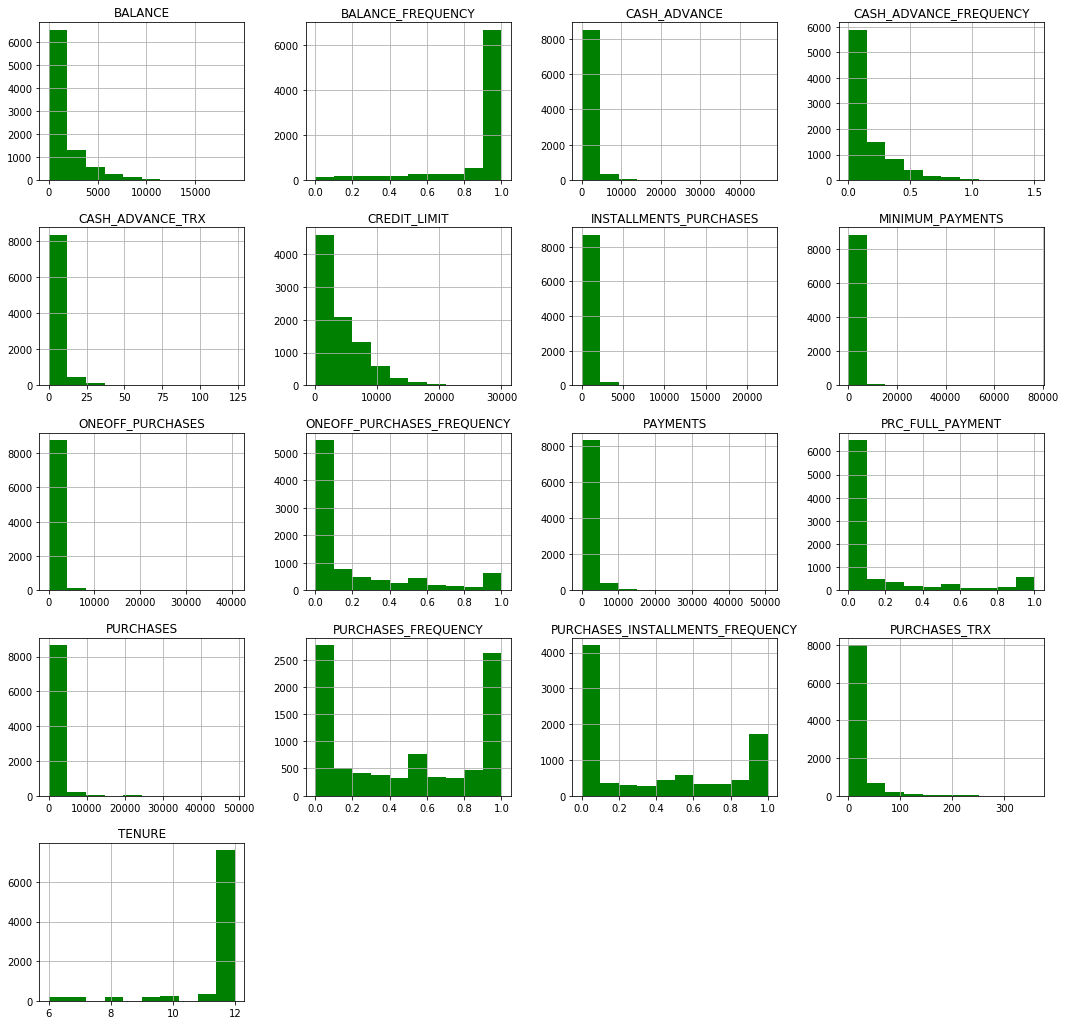

In [23]:
# EXPORATORY DATA ANALYSIS
credit_card.hist(figsize=(18,18),color = "green" );

# As per given Problem Statement 

# 1. Deriving New KPI's

### a) Monthly_avg_purchase and Cash Advance Amount


In [24]:
#deriving KPI's for Monthly_avg_purchase and Cash_Advance
credit_card['Monthly_avg_purchase']=credit_card['PURCHASES']/credit_card['TENURE']
credit_card['Monthly_cash_advance']=credit_card['CASH_ADVANCE']/credit_card['TENURE']

In [25]:
#view of top 5 observation of 'monthly_avg_purchase'
credit_card['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [26]:
#view of top 5 observation of 'monthly_cash_advance'
credit_card['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [27]:
credit_card[credit_card['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

### b) Purchases by type
    

In [28]:
#top 20 observation of onoff_purchase and Installment_purchases of given data
credit_card.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [29]:
#shape of onoff_purchases and installments_purchases in People who do none probebility
credit_card[(credit_card['ONEOFF_PURCHASES']==0) & (credit_card['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [30]:
#shape of onoff_purchases and installments_purchases in People who do both probebility
credit_card[(credit_card['ONEOFF_PURCHASES']>0) & (credit_card['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [31]:
#shape of onoff_purchases and installments_purchases in People who only do One-Off Purchases probebility
credit_card[(credit_card['ONEOFF_PURCHASES']>0) & (credit_card['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [32]:
#shape of onoff_purchases and installments_purchases in People who only do Installments Purchases probebility.
credit_card[(credit_card['ONEOFF_PURCHASES']==0) & (credit_card['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

                I found out that there are 4 types of purchase behaviour in the data set.

                               1.People who only do One-Off Purchases.
           
                               2.People who only do Installments Purchases.
           
                               3.People who do both.
               
                               4.People who do none.
           
                So deriving a categorical variable based on the behaviour.

In [33]:
def purchase(credit_card):   
    if (credit_card['ONEOFF_PURCHASES']==0) & (credit_card['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit_card['ONEOFF_PURCHASES']>0) & (credit_card['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit_card['ONEOFF_PURCHASES']>0) & (credit_card['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit_card['ONEOFF_PURCHASES']==0) & (credit_card['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [34]:
credit_card['purchase_type']=credit_card.apply(purchase,axis=1)

In [35]:
credit_card['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

### c)Limit_Usage (balance to credit limit ratio)
   
 

In [36]:
#formula used to calculate balance to credit limit ration
credit_card['limit_usage']=credit_card.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [37]:
# top 5 observation of 'limit_usage'
credit_card['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

### d) Payment to minimum payments Ratio


In [38]:
# formula used to caluculate payment to minimum payments Ratio
credit_card['payment_minpay']=credit_card.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
credit_card['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

-----------------------------------------------------------------------------------------------------------------

In [39]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

### Extreme value Treatment
 

In [40]:
# log tranformation
cr_log=credit_card.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [41]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [42]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

-------------------------------------------------------------------------------------------------------------------------------

## 2.Insights from derived KPI's on the Customer Profile

In [43]:
# Average payment_minpayment ratio for each purchse type.
x=credit_card.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values


array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

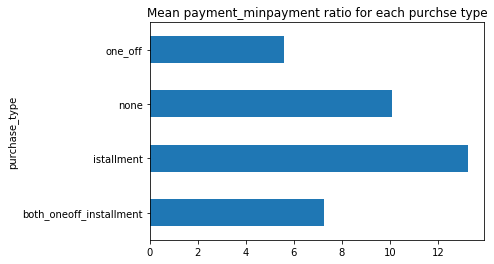

In [44]:
credit_card.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay'])).plot.barh()

plt.title('Mean payment_minpayment ratio for each purchse type')

In [45]:
credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


#### Insight 1: Customers With Installment Purchases are Paying Dues

In [46]:
credit_card[credit_card['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

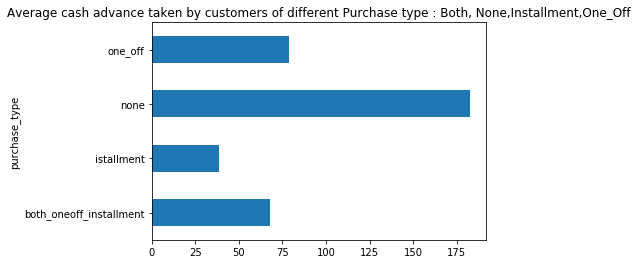

In [47]:
credit_card.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

##### Insight 2: Customers who don't do either one-off or installment purchases take more cash on advance.

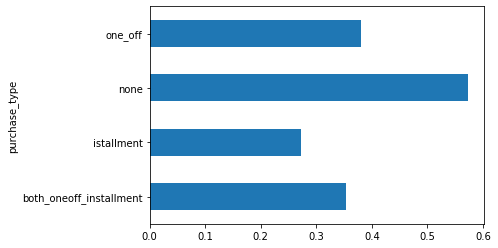

In [48]:
credit_card.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

##### Insight 3: Customers with installment purchases have good credit score.

In [49]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([credit_card,pd.get_dummies(credit_card['purchase_type'])],axis=1)

In [50]:
cre_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,12,7.950000,0.000000,istallment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,48.520000,0.000000,istallment,0.028494,6.660231,0,1,0,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,50.000000,0.000000,istallment,0.019183,0.883197,0,1,0,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,6,24.066667,0.000000,istallment,0.023399,0.986076,0,1,0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,6,0.000000,6.093130,none,0.026915,0.942505,0,0,1,0



## 3.Preparing for Machine learning


In [51]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit_card.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type']).head()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [52]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [53]:
l=['purchase_type']

In [54]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
both_oneoff_installment             0
istallment                          0
none                                0
one_off                             0
dtype: int64

In [55]:
cr_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


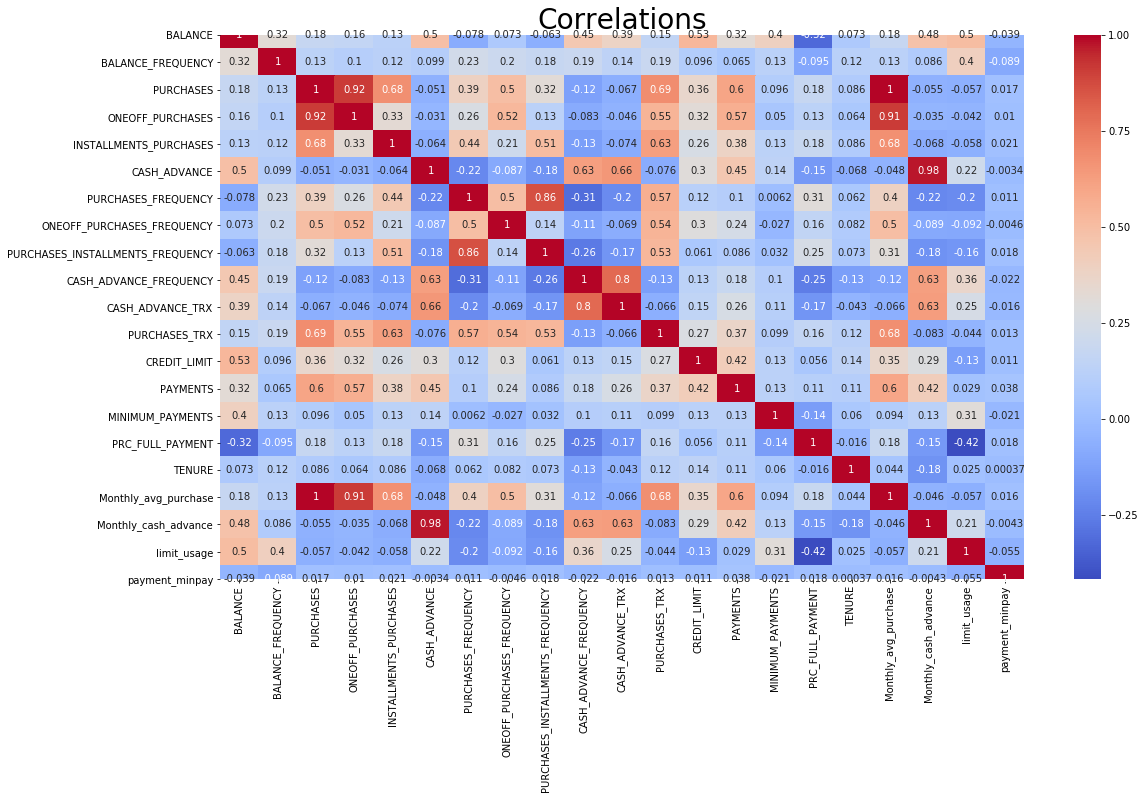

In [56]:
#creating heat map
plt.figure(figsize=(18,10))
sns.heatmap(credit_card.corr(),cmap='coolwarm',annot=True);
plt.title('Correlations', size = 28);

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data 
 

In [57]:
#importing required libraries 
from sklearn.preprocessing import  StandardScaler

#Standardrizing data 
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_dummy)

### Applying PCA 

In [58]:
#importing PCA libraries 
from sklearn.decomposition import PCA

In [59]:
cr_dummy.shape

(8950, 17)

In [60]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [61]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0

In [62]:
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [63]:
var_ratio

{4: 0.8115442762351249,
 5: 0.8770555795291429,
 6: 0.9186492443512619,
 7: 0.941092525603014,
 8: 0.9616114053683062,
 9: 0.9739787081990645,
 10: 0.9835896584630706,
 11: 0.9897248107341952,
 12: 0.9927550009135229,
 13: 0.9953907562385423,
 14: 0.9979616898169594}

### Since 6 components are explaining about 90% variance so we select 5 components

In [64]:
pc=PCA(n_components=6)

In [65]:
p=pc.fit(cr_scaled)

In [66]:
cr_scaled.shape

(8950, 17)

In [67]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [68]:
np.sum(p.explained_variance_)

15.618782269308793

In [69]:
var_ratio

{4: 0.8115442762351249,
 5: 0.8770555795291429,
 6: 0.9186492443512619,
 7: 0.941092525603014,
 8: 0.9616114053683062,
 9: 0.9739787081990645,
 10: 0.9835896584630706,
 11: 0.9897248107341952,
 12: 0.9927550009135229,
 13: 0.9953907562385423,
 14: 0.9979616898169594}

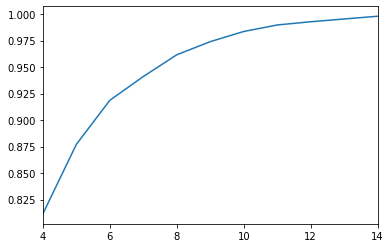

In [70]:
#plot of var_ratio
pd.Series(var_ratio).plot()

---
# Since 5 components are explaining about 87% variance so we select 5 components

---



In [71]:
cr_scaled.shape

(8950, 17)

In [72]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [73]:
dd=pd.DataFrame(reduced_cr)

In [74]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


In [75]:
dd.shape

(8950, 6)

In [76]:
col_list=cr_dummy.columns

In [77]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [78]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


### So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable but in our case its not.

In [79]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

In [80]:
type(cr_pca)

sklearn.decomposition.pca.PCA

### Clustering 

---
<big>

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

</big>

---

In [81]:
# Importing clustering libraries
from sklearn.cluster import KMeans

In [82]:
#K means algorithm of 4 cluster 
km_4=KMeans(n_clusters=4,random_state=123)

In [83]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [84]:
km_4.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [85]:
pd.Series(km_4.labels_).value_counts()

3    2769
2    2224
1    2088
0    1869
dtype: int64

Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.

### Identify cluster Error.

In [86]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )

In [87]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93308.191346
2,3,70745.193400
3,4,49446.066485
4,5,42548.525149
5,6,37712.978462
6,7,34124.456465
7,8,31164.892627
8,9,28601.707202
9,10,26302.829706


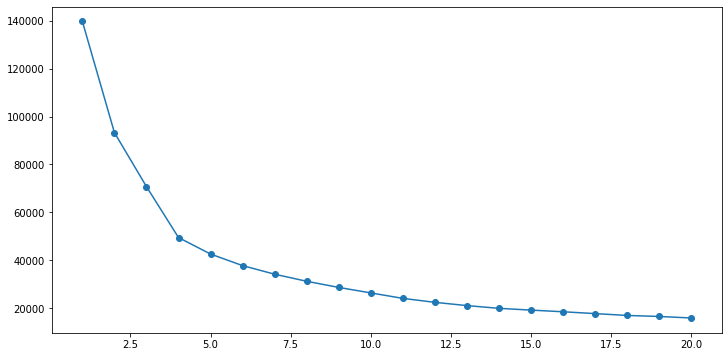

In [88]:
# allow plots to appear in the notebook
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From above graph we will find elbow range. here it is 4,5,6

### Silhouette Coefficient

In [89]:
from sklearn import metrics

In [90]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [91]:
scores

[0.33194521792342646,
 0.3540311511892248,
 0.4370857743965948,
 0.43121145209717765,
 0.42281449146537453,
 0.40224408261793543,
 0.4144537298622617,
 0.3889240713086914,
 0.39299913554746213,
 0.3678798374268568,
 0.3669766371659528,
 0.34034730550080816,
 0.3526966868656406,
 0.34392337889574587,
 0.3336956707851422,
 0.3223166820085196,
 0.3322902581427395,
 0.3274102528436649,
 0.3239792346891927]

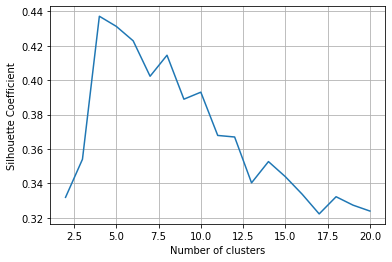

In [92]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

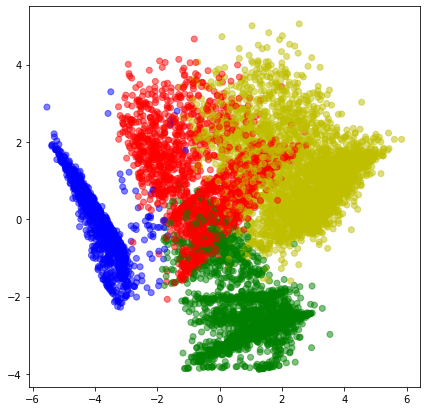

In [93]:
#maping cluster 
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

<big> It is very difficult to draw iddividual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps <big> 



In [94]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [95]:
df_pair_plot['Cluster']=km_4.labels_#Add cluster column in the data frame

In [96]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,2
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,0


C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


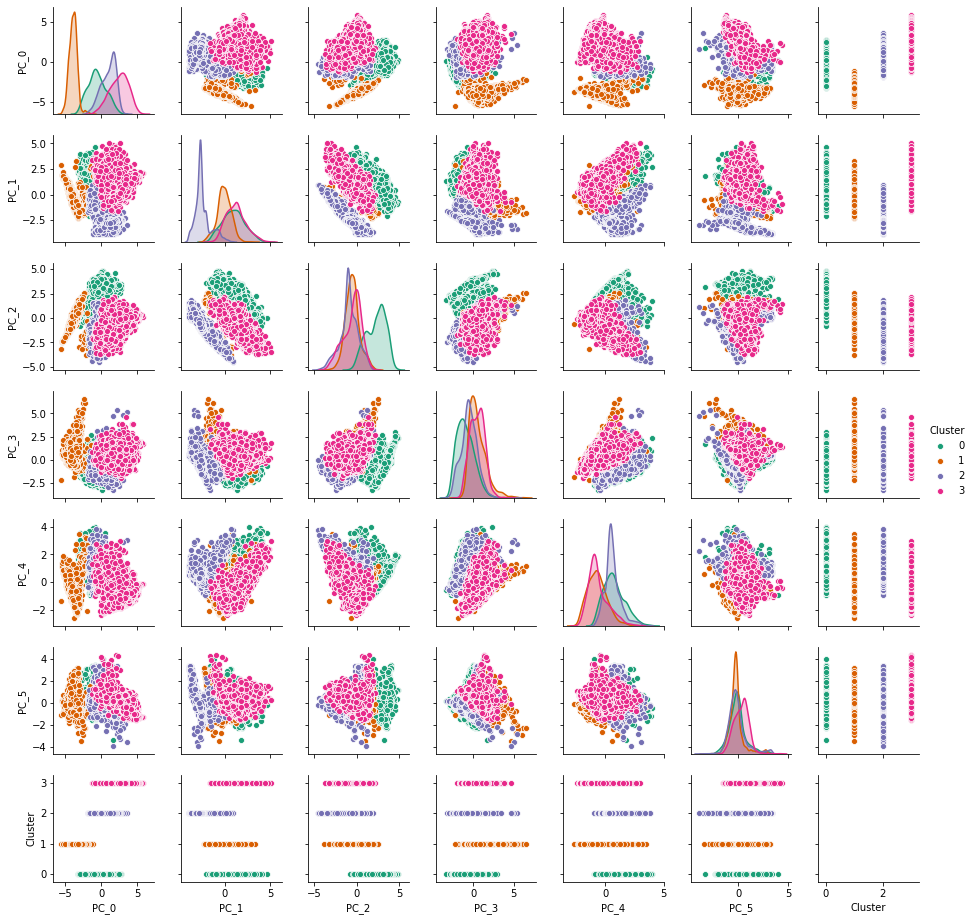

In [97]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

#### It shows that first two components are able to indentify clusters

#### Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them.
#### To interprate result we need to use our data frame

In [98]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So we are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [99]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [100]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [101]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [102]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_avg_purchase,69.875917,0.148297,47.626256,193.008043
Monthly_cash_advance,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576076,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay,5.573672,9.936617,13.422420,7.245651
both_oneoff_installment,0.000535,0.001916,0.000000,1.000000
istallment,0.000000,0.017241,1.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000


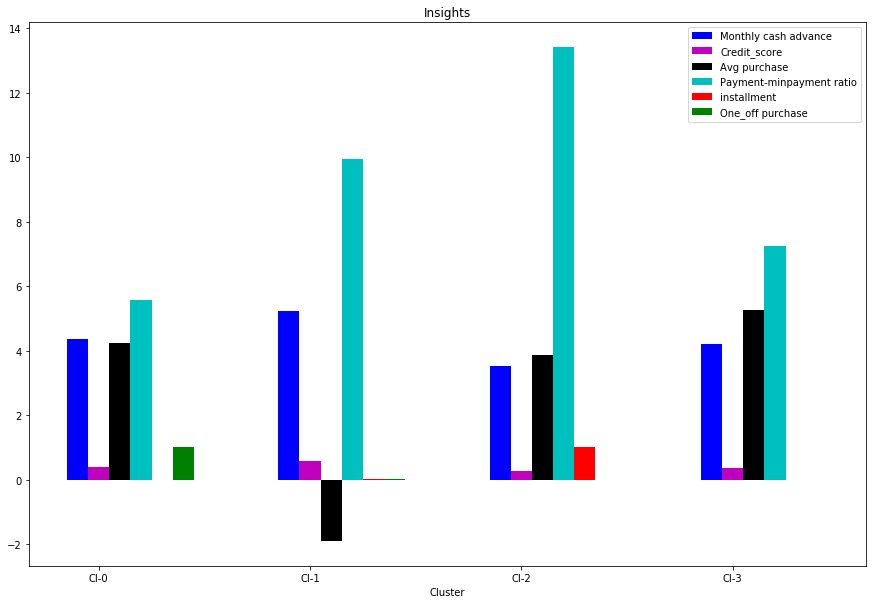

In [103]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI
---

In [104]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547 



# Finding behaviour with 5 Clusters:
---

In [105]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 2, 0, ..., 4, 2, 0])

In [106]:
pd.Series(km_5.labels_).value_counts()

4    2149
2    2081
1    1977
0    1862
3     881
dtype: int64

Text(0, 0.5, 'PC_1')

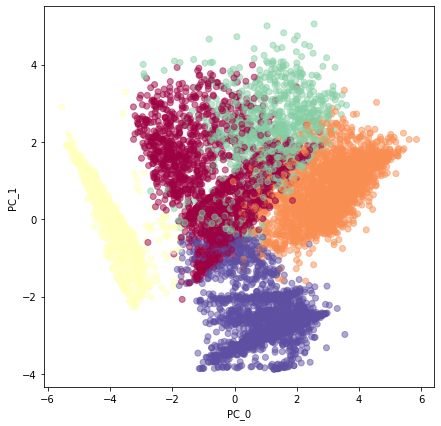

In [107]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [108]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [109]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.096670,34.587759,0.032196,27.703746,11.905537
Monthly_avg_purchase,68.917645,210.536468,0.086126,141.584086,47.369817
Monthly_cash_advance,74.517541,4.040708,185.038534,249.942101,20.636870
limit_usage,0.377959,0.258931,0.576110,0.600096,0.250011
CASH_ADVANCE_TRX,2.697637,0.152757,6.448823,10.384790,0.550489
payment_minpay,5.562287,8.675499,9.963172,3.651686,13.783426
both_oneoff_installment,0.002148,1.000000,0.000000,0.900114,0.000000
istallment,0.000000,0.000000,0.015858,0.088536,1.000000
one_off,0.997852,0.000000,0.002883,0.011351,0.000000
none,0.000000,0.000000,0.981259,0.000000,0.000000


# With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

*** So we don't have quite distinguishable characteristics with 5 clusters, ***

In [110]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1862
1          1    1977
2          2    2081
3          3     881
4          4    2149
Name: Cluster_5, dtype: int64


In [111]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1862   20.804469
1  1977   22.089385
2  2081   23.251397
3   881    9.843575
4  2149   24.011173


# Finding behavior with 6 clusters

In [112]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 3, 4, ..., 2, 3, 1])

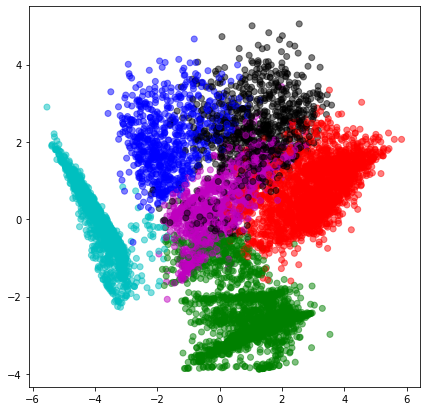

In [113]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [114]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [115]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,34.663789,5.967143,11.905537,0.030347,7.760575,27.919908
Monthly_avg_purchase,211.196582,54.091602,47.369817,0.088891,78.585295,140.374727
Monthly_cash_advance,4.027720,205.502536,20.636870,184.829434,3.603272,242.856971
limit_usage,0.258206,0.605930,0.250011,0.575724,0.245772,0.600654
CASH_ADVANCE_TRX,0.150838,7.642857,0.550489,6.434971,0.125212,10.000000
payment_minpay,8.702974,3.257979,13.783426,9.976487,6.911822,3.616973
both_oneoff_installment,1.000000,0.000000,0.000000,0.000000,0.006768,0.911899
istallment,0.000000,0.000000,1.000000,0.016378,0.000000,0.088101
one_off,0.000000,1.000000,0.000000,0.000000,0.993232,0.000000
none,0.000000,0.000000,0.000000,0.983622,0.000000,0.000000


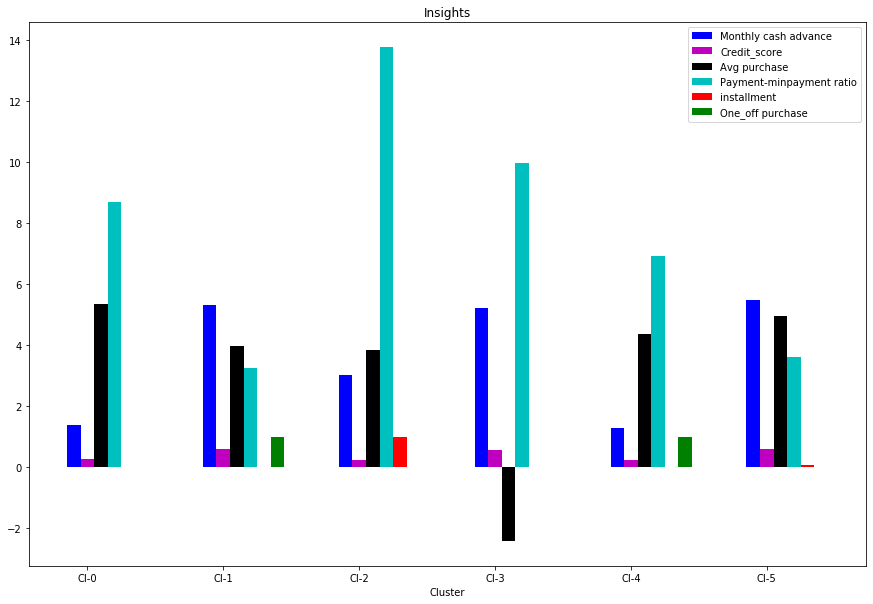

In [116]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [117]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([1.39320045, 5.32545837, 3.02707927, 5.21943342, 1.28184245,
       5.49247267])

## Insights with  6 clusters

- Here also groups are overlapping .
     


---


# Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [118]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [119]:
#K means algorithm 
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: Deprec

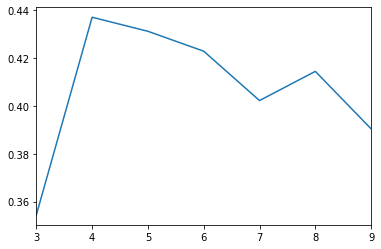

In [120]:
pd.Series(score).plot()

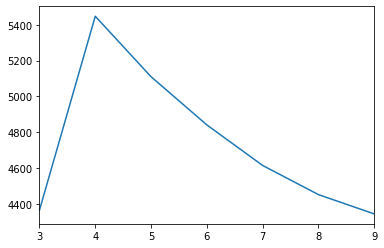

In [121]:
pd.Series(score_c).plot()

## Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.